In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper

import torch
import numpy as np

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [4]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
default_conf['single_function']['training_params']['kwargs']['data_path'] = os.path.join(
    BASE_DIR,
    default_conf['single_function']['training_params']['kwargs']['data_dir'],
     default_conf['single_function']['training_params']['kwargs']['extension'],
    default_conf['single_function']['training_params']['kwargs']['data_file'])

## Generating data on the fly from a simple function.

In [6]:
default_conf['multiple_functions']['experiment_params']

{'datagenerator': 'cnp.datageneration.PolynomialRegression',
 'dim_observation': 50,
 'dimout': 2,
 'dimr': 128,
 'dimx': 1,
 'dimy': 1,
 'dropout': 0,
 'lr': 0.0001,
 'max_contx': 10,
 'max_funcs': 10,
 'min_contx': 3,
 'min_funcs': 2,
 'n_epochs': 1000,
 'num_layers_aggr': 3,
 'num_layers_decoder': 3,
 'num_layers_encoder': 4,
 'num_neurons_aggr': 10,
 'num_neurons_decoder': 128,
 'num_neurons_encoder': 128,
 'print_after': 100,
 'range_x': [-2, 2],
 'seed': 0,
 'train_on_gpu': False}

In [19]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

In [20]:
kwargs = default_conf['multiple_functions']['training_params']['kwargs']

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         3.277
Mean Validation loss after 0 equals                     3.253

Validation loss for the function plotted:                 3.253


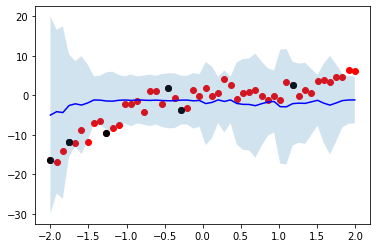

 10%|█         | 100/1000 [00:32<04:17,  3.50it/s]

Mean training loss at epoch 100 :                         2.887
Mean Validation loss after 100 equals                     3.147

Validation loss for the function plotted:                 3.147


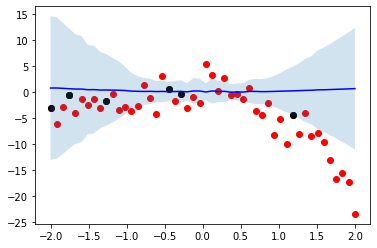

 20%|██        | 200/1000 [01:02<03:49,  3.49it/s]

Mean training loss at epoch 200 :                         2.787
Mean Validation loss after 200 equals                     3.058

Validation loss for the function plotted:                 3.058


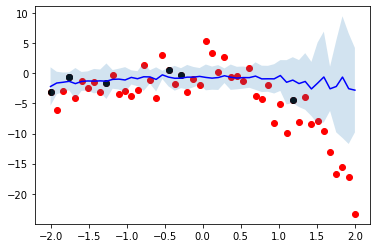

 30%|███       | 300/1000 [01:32<03:39,  3.19it/s]

Mean training loss at epoch 300 :                         2.745
Mean Validation loss after 300 equals                     2.774

Validation loss for the function plotted:                 2.774


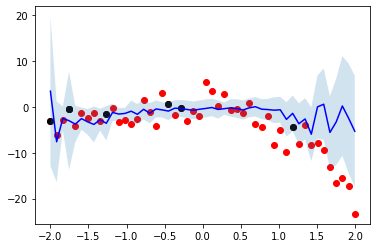

 40%|████      | 400/1000 [02:01<02:48,  3.57it/s]

Mean training loss at epoch 400 :                         2.576
Mean Validation loss after 400 equals                     3.488

Validation loss for the function plotted:                 3.488


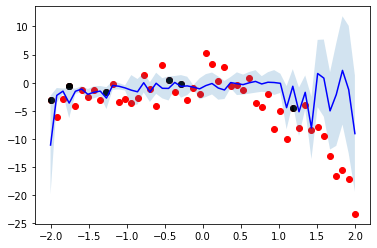

 50%|█████     | 500/1000 [02:29<02:20,  3.57it/s]

Mean training loss at epoch 500 :                         2.475
Mean Validation loss after 500 equals                     12.053

Validation loss for the function plotted:                 12.053


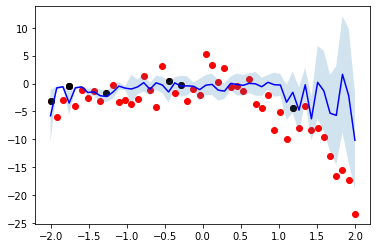

 60%|██████    | 600/1000 [02:58<01:51,  3.59it/s]

Mean training loss at epoch 600 :                         2.497
Mean Validation loss after 600 equals                     6.335

Validation loss for the function plotted:                 6.335


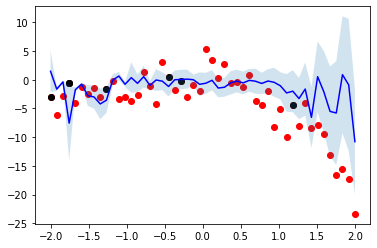

 70%|███████   | 700/1000 [03:28<01:32,  3.25it/s]

Mean training loss at epoch 700 :                         2.805
Mean Validation loss after 700 equals                     3.272

Validation loss for the function plotted:                 3.272


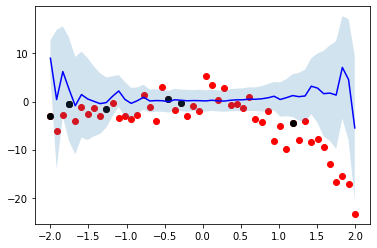

 80%|████████  | 800/1000 [03:58<00:57,  3.50it/s]

Mean training loss at epoch 800 :                         2.409
Mean Validation loss after 800 equals                     18.941

Validation loss for the function plotted:                 18.941


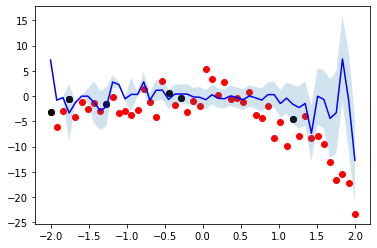

 90%|█████████ | 900/1000 [04:28<00:29,  3.36it/s]

Mean training loss at epoch 900 :                         2.31
Mean Validation loss after 900 equals                     59.619

Validation loss for the function plotted:                 59.619


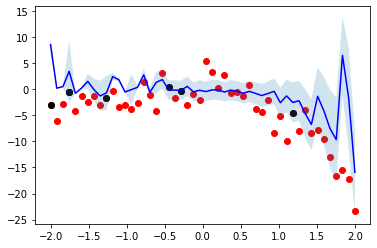

100%|██████████| 1000/1000 [04:59<00:00,  3.34it/s]


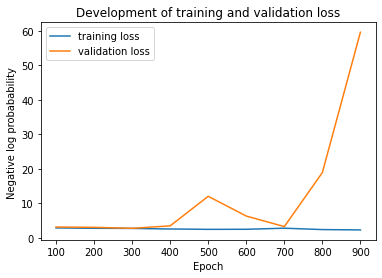

In [22]:
state_dict_encoder, state_dict_decoder = trainer.run_training(batch_size_train=1,
             batch_size_vali=1,
             plotting=True,
             kwargs=kwargs)

In [30]:
trainer.run_test(
    state_dict_encoder=state_dict_encoder,
    state_dict_decoder=state_dict_decoder, 
    batch_size_test=1,
    plotting=True,
    kwargs=kwargs)


AttributeError: 'RegressionTrainer' object has no attribute 'seed'

In [11]:
kwargs

{'mu': 0,
 'sigma': 2,
 'num_instances_train': 64,
 'num_instances_vali': 2,
 'purpose': 'test'}

## Using different datapoints from the same function

In [23]:
trainer = RegressionTrainer(**default_conf['single_function']['experiment_params'])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

  0%|          | 0/100000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         39.673
Mean Validation loss after 0 equals                     15.658

Validation loss for the function plotted:                 18.812


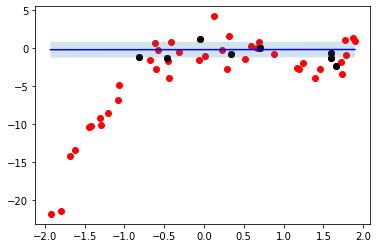

  1%|          | 998/100000 [00:38<1:01:10, 26.97it/s]

Mean training loss at epoch 1000 :                         3.24
Mean Validation loss after 1000 equals                     3.114

Validation loss for the function plotted:                 3.118


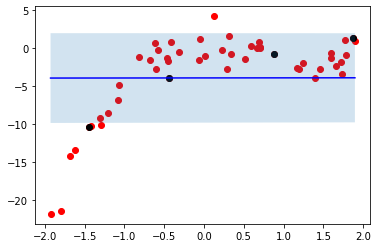

  2%|▏         | 2000/100000 [01:17<1:02:36, 26.09it/s]

Mean training loss at epoch 2000 :                         3.244
Mean Validation loss after 2000 equals                     3.138

Validation loss for the function plotted:                 3.146


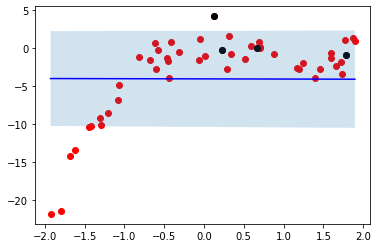

  3%|▎         | 2999/100000 [01:58<1:11:02, 22.76it/s]

Mean training loss at epoch 3000 :                         3.24
Mean Validation loss after 3000 equals                     3.13

Validation loss for the function plotted:                 3.132


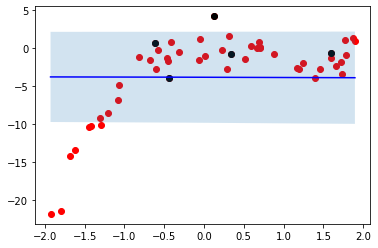

  4%|▍         | 4000/100000 [02:38<1:00:43, 26.35it/s]

Mean training loss at epoch 4000 :                         3.238
Mean Validation loss after 4000 equals                     3.123

Validation loss for the function plotted:                 3.126


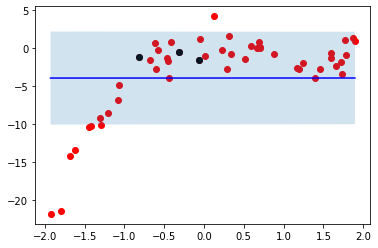

  5%|▍         | 4999/100000 [03:25<1:00:48, 26.04it/s]

Mean training loss at epoch 5000 :                         3.232
Mean Validation loss after 5000 equals                     3.106

Validation loss for the function plotted:                 3.103


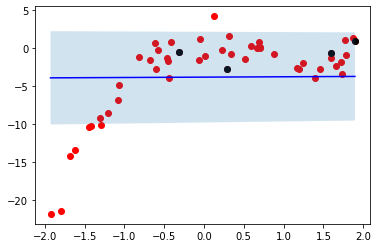

  6%|▌         | 5999/100000 [04:12<1:06:58, 23.39it/s]

Mean training loss at epoch 6000 :                         3.24
Mean Validation loss after 6000 equals                     3.13

Validation loss for the function plotted:                 3.133


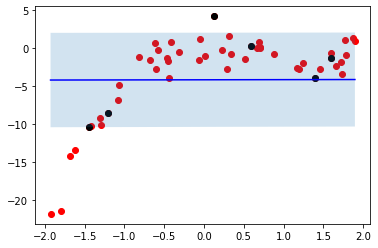

  7%|▋         | 6998/100000 [04:55<1:03:08, 24.55it/s]

Mean training loss at epoch 7000 :                         3.244
Mean Validation loss after 7000 equals                     3.129

Validation loss for the function plotted:                 3.134


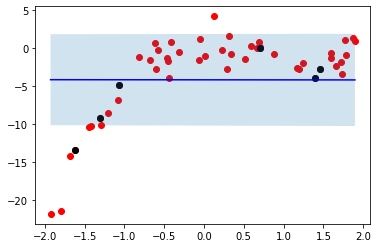

  7%|▋         | 7051/100000 [04:58<1:05:29, 23.66it/s]


KeyboardInterrupt: 

In [7]:
model_weights = trainer.run_training(**default_conf['single_function']['training_params'])
